In [84]:

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from librosa import effects as lreff
from scipy.io import wavfile

import os
import pathlib

from datetime import datetime as dt

from IPython import display as ipd

KeyboardInterrupt: 

In [ ]:
i = 0

while(i < 30)
    myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
    sd.wait()  # Wait until recording is finished
    write('full_data/non-zigzag/output.wav', fs, myrecording)  # Save as WAV file 
    

# Keyword Spotter - Project 2
### For ECGR 4127 - Joelle Bailey

## Import Libraries

In [147]:
import tensorflow as tf
from tensorflow.lite.experimental.microfrontend.python.ops import audio_microfrontend_op as frontend_op
import numpy as np
import time
from scipy.io import wavfile
import random
import sys
import io
import os
import pathlib
import glob
from datetime import datetime as dt
from numpy import log as ln
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import IPython
import IPython.display as ipd
import tensorflow as tf
%matplotlib inline
import pyaudio
from queue import Queue
from threading import Thread
import math
import time
import librosa


## Record Data

In [466]:
#### Set Parameters*

i16min            = -32768
i16max            = 32767
fsamp             = 16000
wave_length_ms    = 1000
wave_length_samps = 16000
window_size_ms    = 60
window_step_ms    = 40
num_filters       = 32
use_microfrontend = True
keyword        = 'zigzag'#####Insert your keyword
keyword2        = 'wow'#####Insert your keyword
spectrogram_shape = (64, 24, 32, 1)

chunk_duration = 1.0 # Each read length in seconds from mic.
fs = 16000 # sampling rate for mic
sample_rate = 16000 # sampling rate for mic
chunk_samples = int(fs * chunk_duration) # Each read length in number of samples.

# Each model input data duration in seconds, need to be an integer numbers of chunk_duration
feed_duration = 1.0
feed_samples = int(fs * feed_duration)

assert feed_duration/chunk_duration == int(feed_duration/chunk_duration)

#### Create keyword & noise folders*

parent_dir = os.getcwd() #gets current directory
folder_pre = "Augmented_" 
folder = folder_pre + keyword #name of directory
dir = os.path.join(parent_dir,folder)
noise_dir=os.path.join(parent_dir,"noise")
#os.mkdir(dir) #creating folder
#os.mkdir(noise_dir) #creating folder
keyword_directory=dir + '\\'   
print("Directory '% s' created" % folder)
print("Directory 'noise' created")


parent_dir = os.getcwd() #gets current directory

folder = "AudioCaptureAndAugment\\full_data\\zigzag" #name of directory
dir = os.path.join(parent_dir,folder)

folder_target_2 = "AudioCaptureAndAugment\\full_data\\wow"
dir2 = os.path.join(parent_dir,folder_target_2)

noise_dir=os.path.join(parent_dir, "AudioCaptureAndAugment\\full_data\\non-zigzag-noise")

nontarget_dir=os.path.join(parent_dir, "AudioCaptureAndAugment\\full_data\\non-zigzag-nontarget")

keyword_directory_1=dir + '\\'
keyword_directory_2=dir2 + '\\'
nonkeyword_directory = noise_dir + '\\'
nonkeyword_directory2 = nontarget_dir + '\\'
nonkeyword = "non-zigzag_noise"
nonkeyword2 = "non-zigzag_nontarget"

Directory 'Augmented_zigzag' created
Directory 'noise' created


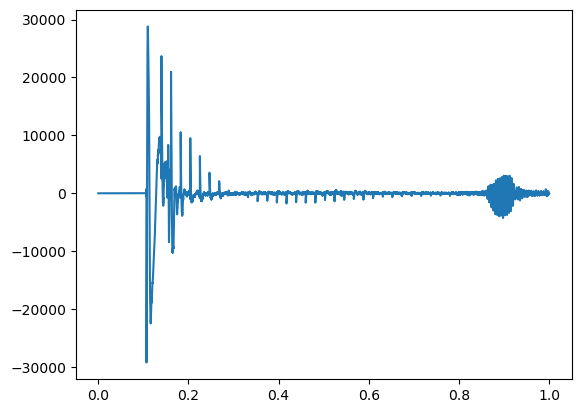

In [813]:
#### Run this code to get in an audio sample*

# Queue to communiate between the audio callback and main thread
q = Queue()
run = True
silence_threshold = 50
# Run the demo for a timeout seconds
timeout = time.time() + 1 
# Data buffer for the input wavform
data = np.zeros(feed_samples, dtype='int16')

def callback(in_data, frame_count, time_info, status):
    global run, timeout, data, silence_threshold    
    if time.time() > timeout:
        run = False        
    data0 = np.frombuffer(in_data, dtype='int16')
    data = np.append(data,data0)    
    if len(data) > feed_samples:
        data = data[-feed_samples:]
        # Process data async by sending a queue.
        q.put(data)
    return (in_data, pyaudio.paContinue)

stream = pyaudio.PyAudio().open(
    format=pyaudio.paInt16,
    channels=1,
    rate=fs,
    input=True,
    frames_per_buffer=chunk_samples,
    input_device_index=0,
    stream_callback=callback)
stream.start_stream()
try:
    while run:        
        data = q.get()
except (KeyboardInterrupt, SystemExit):
    stream.stop_stream()
    stream.close()
    timeout = time.time()
    run = False      
stream.stop_stream()
stream.close()

sample_rate = fs


#Displaying wave file data
plt.plot(np.arange(1*fs)/fs, data)
plt.show()
ipd.Audio(data, rate=fs)



In [7]:
which_target = 2
# 0 = zigzag, 1 = wow, 2 = noise, 3 = non_target_word
data

array([   0,    0,   -1, ..., -143, -115,  -99], dtype=int16)

In [467]:
#### If the Sample looks good run cell below to save it 

if which_target == 0:
    # #saving the wave file to training_data
    date_str = dt.now().strftime("%H%M%S").lower()
    current_name = f"{keyword_directory_1}{keyword}_{date_str}.wav"
    write(current_name, sample_rate, data.astype(np.int16))
    print("Audio sample saved")
    
if which_target == 1:
    # #saving the wave file to training_data
    date_str = dt.now().strftime("%H%M%S").lower()
    current_name = f"{keyword_directory_2}{keyword2}_{date_str}.wav"
    write(current_name, sample_rate, data.astype(np.int16))
    print("Audio sample saved 2nd target")

#### Noise
#* To get noise data run "get data" loop again to get ambient room
#* Save here
#* Get ~3 samples total

if which_target == 2:
    # #saving the wave file to training_data
    date_str = dt.now().strftime("%H%M%S").lower()
    current_name = f"{nonkeyword_directory}{nonkeyword}_{date_str}.wav"
    write(current_name, sample_rate, data.astype(np.int16))
    print("Audio sample saved as noise")
    
if which_target == 3:
    # #saving the wave file to training_data
    date_str = dt.now().strftime("%H%M%S").lower()
    current_name = f"{nonkeyword_directory2}{nonkeyword2}_{date_str}.wav"
    write(current_name, sample_rate, data.astype(np.int16))
    print("Audio sample saved as non target")

Audio sample saved as noise


## Pull Data

In [669]:
dataset = 'full-speech-files' #'mini-speech' # use the full speech commands stored as files 

silence_str = "_silence"  
unknown_str = "_unknown"
EPOCHS = 25

In [670]:
commands = ['zigzag', 'wow'] 
if dataset == 'mini-speech':
  data_dir = pathlib.Path(os.path.join(os.getcwd(), 'AudioCaptureAndAugment/full_data'))
  if not data_dir.exists():
    tf.keras.utils.get_file('mini_speech_commands.zip',
          origin="http://storage.googleapis.com/download.tensorflow.org/data/mini_speech_commands.zip",
          extract=True, cache_dir='.', cache_subdir='data')
    commands = np.array(tf.io.gfile.listdir(str(data_dir))) # if you want to use all the command words
  # commands = commands[commands != 'README.md']
elif dataset == 'full-speech-files':
  # data_dir = '/dfs/org/Holleman-Coursework/data/speech_dataset'
  data_dir = pathlib.Path(os.path.join(os.getcwd(), 'AudioCaptureAndAugment\\full_data'))

elif dataset == 'full-speech-ds':
    raise RuntimeError("full-speech-ds is not really supported yet")

In [671]:
data_dir

WindowsPath('C:/Users/JBHam/Documents/4127/speech_detect_examples/AudioCaptureAndAugment/full_data')

In [672]:
label_list = commands.copy()
label_list.insert(0, silence_str)
label_list.insert(1, unknown_str)
print('label_list:', label_list)

label_list: ['_silence', '_unknown', 'zigzag', 'wow']


In [673]:
commands = ['zigzag', 'wow'] 
if dataset == 'mini-speech':
  data_dir = pathlib.Path(os.path.join(os.getcwd(), 'AudioCaptureAndAugment/full_data'))
  if not data_dir.exists():
    tf.keras.utils.get_file('mini_speech_commands.zip',
          origin="http://storage.googleapis.com/download.tensorflow.org/data/mini_speech_commands.zip",
          extract=True, cache_dir='.', cache_subdir='data')
  # commands = np.array(tf.io.gfile.listdir(str(data_dir))) # if you want to use all the command words
  # commands = commands[commands != 'README.md']
elif dataset == 'full-speech-files':
  # data_dir = '/dfs/org/Holleman-Coursework/data/speech_dataset'
  data_dir = pathlib.Path(os.path.join(os.getcwd(), 'AudioCaptureAndAugment/full_data'))

elif dataset == 'full-speech-ds':
    raise RuntimeError("full-speech-ds is not really supported yet")

data_dir

label_list = commands.copy()
label_list.insert(0, silence_str)
label_list.insert(1, unknown_str)
print('label_list:', label_list)

label_list: ['_silence', '_unknown', 'zigzag', 'wow']


In [674]:
if dataset == 'mini-speech' or dataset == 'full-speech-files':
    filenames = tf.io.gfile.glob(str(data_dir) + '/*/*.wav') 
    # with the next commented-out line, you can choose only files for words in label_list
    # filenames = tf.concat([tf.io.gfile.glob(str(data_dir) + '/' + cmd + '/*') for cmd in label_list], 0)
    filenames = tf.random.shuffle(filenames)
    num_samples = len(filenames)
    print('Number of total examples:', num_samples)
    # print('Number of examples per label:',
    #       len(tf.io.gfile.listdir(str(data_dir/commands[0]))))
    print('Example file tensor:', filenames[0])

Number of total examples: 77466
Example file tensor: tf.Tensor(b'C:\\Users\\JBHam\\Documents\\4127\\speech_detect_examples\\AudioCaptureAndAugment\\full_data\\non-zigzag-nontarget\\19785c4e_nohash_1 (3).wav', shape=(), dtype=string)


In [675]:
if dataset == 'mini-speech':
  print('Using mini-speech')
  num_train_files = int(0.8*num_samples) 
  num_val_files = int(0.1*num_samples) 
  num_test_files = num_samples - num_train_files - num_val_files
  train_files = filenames[:num_train_files]
  val_files = filenames[num_train_files: num_train_files + num_val_files]
  test_files = filenames[-num_test_files:]
elif dataset == 'full-speech-files':  
  # the full speech-commands set lists which files are to be used
  # as test and validation data; train with everything else
  fname_val_files = os.path.join(data_dir, 'validation_list.txt')    
  with open(fname_val_files) as fpi_val:
    val_files = fpi_val.read().splitlines()
  # validation_list.txt only lists partial paths
  val_files = [os.path.join(data_dir, fn) for fn in val_files]
  fname_test_files = os.path.join(data_dir, 'testing_list.txt')

  with open(fname_test_files) as fpi_tst:
    test_files = fpi_tst.read().splitlines()
  # testing_list.txt only lists partial paths
  test_files = [os.path.join(data_dir, fn).rstrip() for fn in test_files]    

  # convert the TF tensor filenames into an array of strings so we can use basic python constructs
  train_files = [f.decode('utf8') for f in filenames.numpy()]
  # don't train with the _background_noise_ files; exclude when directory name starts with '_'
  train_files = [f for f in train_files] #if f.split('/')[-1][0] != '_'
  # validation and test files are listed explicitly in *_list.txt; train with everything else
  train_files = list(set(train_files) - set(test_files) - set(val_files))
  # now convert back into a TF tensor so we can use the tf.dataset pipeline
  train_files = tf.constant(train_files)    
  print("full-speech-files is in progress.  Good luck!")
elif dataset == 'full-speech-ds':  
    print("Using full-speech-ds. This is in progress.  Good luck!")
else:
  raise ValueError("dataset must be either full-speech-files, full-speech-ds or mini-speech")
print('Training set size', len(train_files))
print('Validation set size', len(val_files))
print('Test set size', len(test_files))

full-speech-files is in progress.  Good luck!
Training set size 61695
Validation set size 14114
Test set size 1657


In [676]:
def decode_audio(audio_binary):
  audio, _ = tf.audio.decode_wav(audio_binary, desired_channels=1, desired_samples=16000)
  return tf.squeeze(audio, axis=-1)

# @tf.function
def get_label(file_path):
  parts = tf.strings.split(file_path, os.path.sep)
  in_set = tf.reduce_any(parts[-2] == label_list)
  label = tf.cond(in_set, lambda: parts[-2], lambda: tf.constant(unknown_str))
  # print(f"parts[-2] = {parts[-2]}, in_set = {in_set}, label = {label}")
  # Note: You'll use indexing here instead of tuple unpacking to enable this 
  # to work in a TensorFlow graph.
  return  label # parts[-2]

def get_waveform_and_label(file_path):
  label = get_label(file_path)
  audio_binary = tf.io.read_file(file_path)
  waveform = decode_audio(audio_binary)
  return waveform, label

def get_spectrogram(waveform):
  # Concatenate audio with padding so that all audio clips will be of the 
  # same length (16000 samples)
  zero_padding = tf.zeros([wave_length_samps] - tf.shape(waveform), dtype=tf.int16)
  waveform = tf.cast(0.5*waveform*(i16max-i16min), tf.int16)  # scale float [-1,+1]=>INT16
  equal_length = tf.concat([waveform, zero_padding], 0)
  ## Make sure these labels correspond to those used in micro_features_micro_features_generator.cpp
  spectrogram = frontend_op.audio_microfrontend(equal_length, sample_rate=fsamp, num_channels=num_filters,
                                    window_size=window_size_ms, window_step=window_step_ms)
  return spectrogram

def create_silence_dataset(num_waves, samples_per_wave, rms_noise_range=[0.01,0.2], silent_label=silence_str):
    # create num_waves waveforms of white gaussian noise, with rms level drawn from rms_noise_range
    # to act as the "silence" dataset
    rng = np.random.default_rng()
    rms_noise_levels = rng.uniform(low=rms_noise_range[0], high=rms_noise_range[1], size=num_waves)
    rand_waves = np.zeros((num_waves, samples_per_wave), dtype=np.float32) # pre-allocate memory
    for i in range(num_waves):
        rand_waves[i,:] = rms_noise_levels[i]*rng.standard_normal(samples_per_wave)
    labels = [silent_label]*num_waves
    return tf.data.Dataset.from_tensor_slices((rand_waves, labels))  

def wavds2specds(waveform_ds, verbose=True):
  wav, label = next(waveform_ds.as_numpy_iterator())
  one_spec = get_spectrogram(wav)
  one_spec = tf.expand_dims(one_spec, axis=0)  # add a 'batch' dimension at the front
  one_spec = tf.expand_dims(one_spec, axis=-1) # add a singleton 'channel' dimension at the back    

  num_waves = 0 # count the waveforms so we can allocate the memory
  #print(waveform_ds)
  for wav, label in waveform_ds:
    #print(wav)
    num_waves += 1
  print(f"About to create spectrograms from {num_waves} waves")
  spec_shape = (num_waves,) + one_spec.shape[1:] 
  spec_grams = np.nan * np.zeros(spec_shape)  # allocate memory
  labels = np.nan * np.zeros(num_waves)
  idx = 0
  for wav, label in waveform_ds:    
    if verbose and idx % 250 == 0:
      print(f"\r {idx} wavs processed", end='')
    spectrogram = get_spectrogram(wav)
    # TF conv layer expect inputs structured as 4D (batch_size, height, width, channels)
    # the microfrontend returns 2D tensors (freq, time), so we need to 
    spectrogram = tf.expand_dims(spectrogram, axis=0)  # add a 'batch' dimension at the front
    spectrogram = tf.expand_dims(spectrogram, axis=-1) # add a singleton 'channel' dimension at the back
    spec_grams[idx, ...] = spectrogram
    new_label = label.numpy().decode('utf8')
    new_label_id = np.argmax(new_label == np.array(label_list))    
    labels[idx] = new_label_id # for numeric labels
    # labels.append(new_label) # for string labels
    idx += 1
  labels = np.array(labels, dtype=int)
  output_ds = tf.data.Dataset.from_tensor_slices((spec_grams, labels))  
  return output_ds


In [677]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
#num_train_files = len(train_files)
#files_ds = tf.data.Dataset.from_tensor_slices(train_files)
#waveform_ds = files_ds.map(get_waveform_and_label) #num_parallel_calls=AUTOTUNE
#train_ds = wavds2specds(waveform_ds)

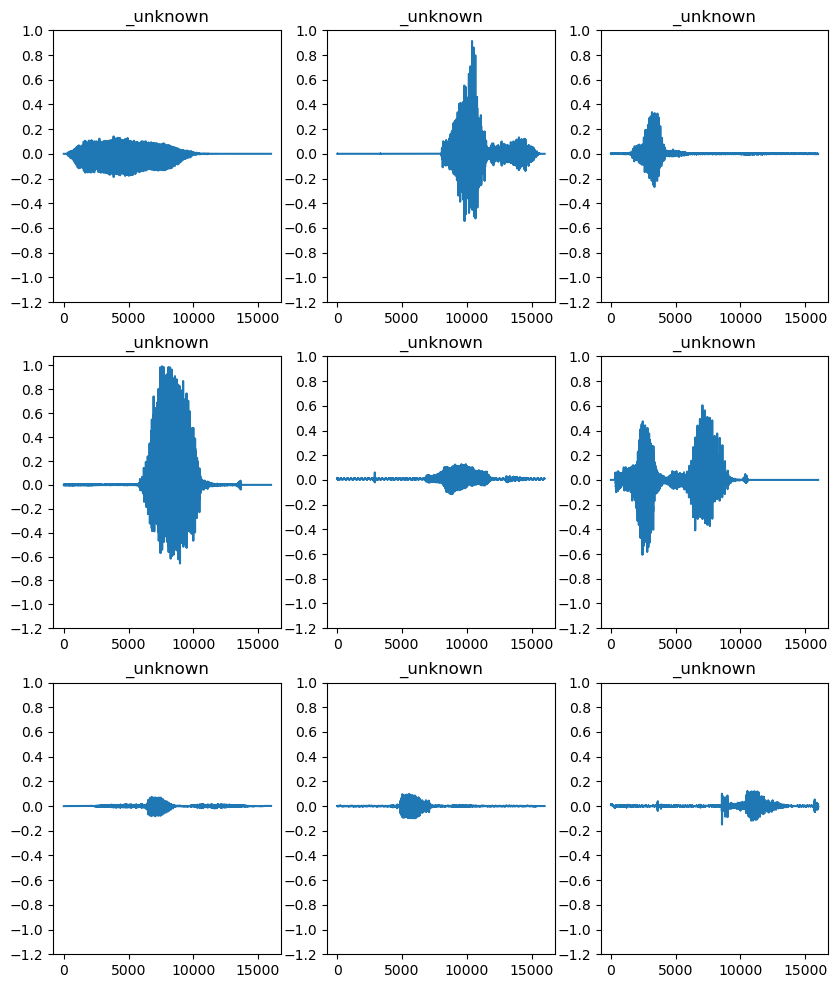

In [496]:
rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))
for i, (audio, label) in enumerate(waveform_ds.take(n)):
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  ax.plot(audio.numpy())
  ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
  label = label.numpy().decode('utf-8')
  ax.set_title(label)

plt.show()

In [806]:
for waveform, label in waveform_ds.take(1):
  label = label.numpy().decode('utf-8')
  spectrogram = get_spectrogram(waveform)

print('Label:', label)
print('Waveform shape:', waveform.shape)
print('Spectrogram shape:', spectrogram.shape)
print('Audio playback')
ipd.Audio(waveform, rate=16000)

Label: _unknown
Waveform shape: (16000,)
Spectrogram shape: (24, 32)
Audio playback


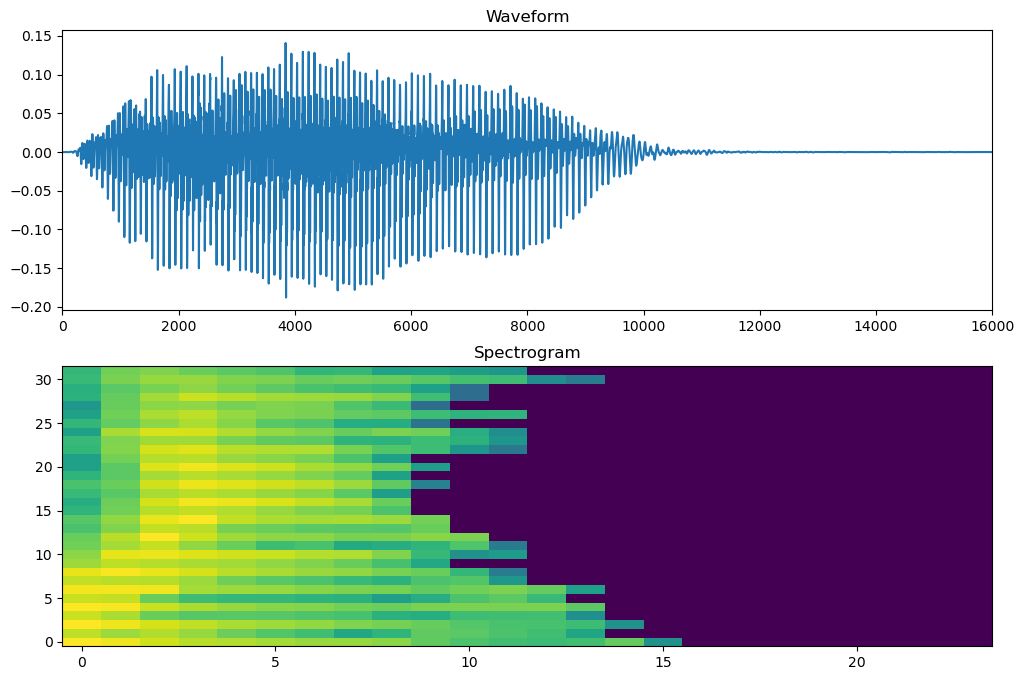

In [235]:
def plot_spectrogram(spectrogram, ax):
  # transpose so that the time is
  # represented in the x-axis (columns).
  freq_bins = spectrogram.shape[1]
  time_dur = spectrogram.shape[0]
  X = np.arange(time_dur)
  Y = range(freq_bins)
  ax.pcolormesh(X, Y, spectrogram.T)

fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(waveform.shape[0])
axes[0].plot(timescale, waveform.numpy())
axes[0].set_title('Waveform')
axes[0].set_xlim([0, 16000])
plot_spectrogram(spectrogram.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.show()

C:\Users\JBHam\AppData\Local\Temp\ipykernel_32012\4207182308.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.set_title(label_list[np.int(label_id)])


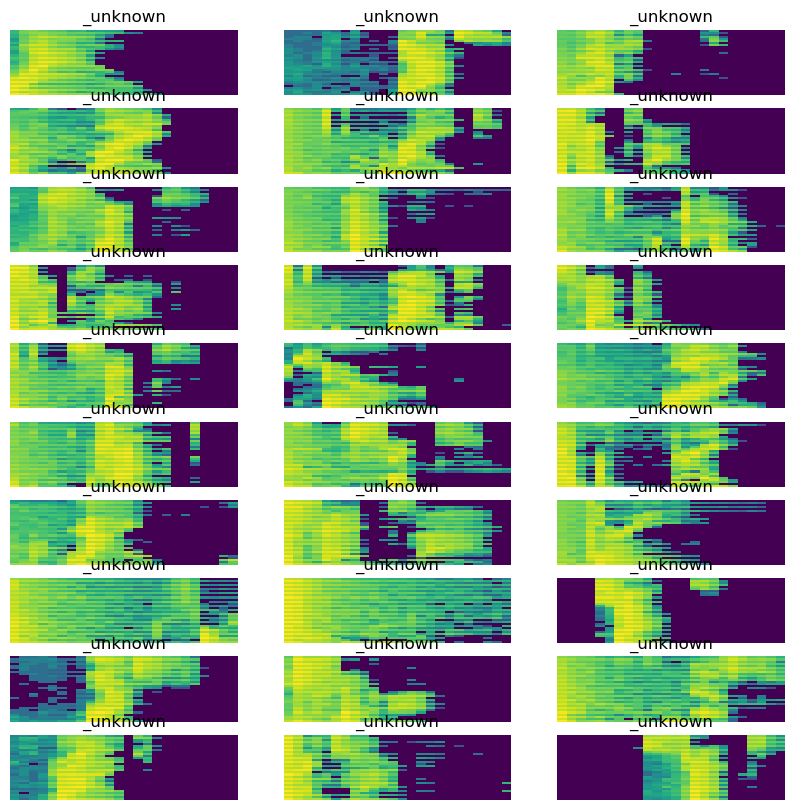

In [236]:
rows = 10
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
for i, (spectrogram, label_id) in enumerate(train_ds.take(n)):
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  plot_spectrogram(np.squeeze(spectrogram.numpy()), ax)
  ax.set_title(label_list[np.int(label_id)])
  ax.axis('off')

plt.show()

In [237]:
keyword_directory_1=dir + '\\'
keyword_directory_2=dir2 + '\\'
nonkeyword_directory = noise_dir + '\\'
nonkeyword_directory2 = nontarget_dir + '\\'

In [238]:
#import os
#import wave
#import struct
#import subprocess

#input_folder = nonkeyword_directory2
#output_folder = nonkeyword_directory2 + '\\converted'

#for filename in os.listdir(input_folder):
#    if filename.endswith(".wav") or filename.endswith(".WAV"):
#        # Open the input wave file
#        input_file = os.path.join(input_folder, filename) 
#        cmd = 'ffmpeg -i '+ input_file +' '+filename+'_PCM.wav'
#        subprocess.call(cmd, shell = True)


## Augment Data

In [678]:
def copy_with_noise(ds_input, rms_level=0.25):
  rng = tf.random.Generator.from_seed(1234)
  wave_shape = tf.constant((wave_length_samps,))
  def add_noise(waveform, label):
    noise = rms_level*rng.normal(shape=wave_shape)
    zero_padding = tf.zeros([wave_length_samps] - tf.shape(waveform), dtype=tf.float32)
    waveform = tf.concat([waveform, zero_padding], 0)    
    noisy_wave = waveform + noise
    return noisy_wave, label

  return ds_input.map(add_noise)

In [679]:
#waveform_ds = augment_with_noise(waveform_ds)
count = 0
for w,l in waveform_ds:
  if w.shape != (16000,):
    print(f"element {count} has shape {w.shape}")
    break
  count += 1
print(count)

71926


In [680]:
def pad_16000(waveform, label):
    zero_padding = tf.zeros([wave_length_samps] - tf.shape(waveform), dtype=tf.int16)
    waveform = tf.concat([waveform, zero_padding], 0)        
    return waveform, label

In [681]:
def count_labels(dataset):
    counts = {}
    for _, lbl in dataset:
        if lbl.dtype == tf.string:
            label = lbl.numpy().decode('utf-8')
        else:
            label = lbl.numpy()
        if label in counts:
            counts[label] += 1
        else:
            counts[label] = 1
    return counts

In [682]:
# Collect what we did to generate the training dataset into a 
# function, so we can repeat with the validation and test sets.
def preprocess_dataset(files, num_silent=None, noisy_reps_of_known=None):
  # if noisy_reps_of_known is not None, it should be a list of rms noise levels
  # For every target word in the data set, 1 copy will be created with each level 
  # of noise added to it.  So [0.1, 0.2] will add 2x noisy copies of the target words 
  if num_silent is None:
    num_silent = int(0.2*len(files))+1
  print(f"Processing {len(files)} files")
  files_ds = tf.data.Dataset.from_tensor_slices(files)
  waveform_ds = files_ds.map(get_waveform_and_label)
  if noisy_reps_of_known is not None:
    # create a few copies of only the target words to balance the distribution
    # create a tmp dataset with only the target words
    ds_only_cmds = waveform_ds.filter(lambda w,l: tf.reduce_any(l == commands))
    for noise_level in noisy_reps_of_known:
       waveform_ds = waveform_ds.concatenate(copy_with_noise(ds_only_cmds, rms_level=noise_level))
  if num_silent > 0:
    silent_wave_ds = create_silence_dataset(num_silent, wave_length_samps, 
                                            rms_noise_range=[0.01,0.2], 
                                            silent_label=silence_str)
    waveform_ds = waveform_ds.concatenate(silent_wave_ds)
  print(f"Added {num_silent} silent wavs and ?? noisy wavs")
  num_waves = 0
  output_ds = wavds2specds(waveform_ds)
  return output_ds

In [683]:
print(f"We have {len(train_files)}/{len(val_files)}/{len(test_files)} training/validation/test files")

We have 61695/14114/1657 training/validation/test files


In [434]:
#print(train_files[:20])
print(label_list)
train_files[:20]

tmp_ds = preprocess_dataset(train_files[:20])
print(count_labels(tmp_ds))

#with tf.device('/CPU:0'): # needed on M1 mac
#    tmp_ds = preprocess_dataset(train_files[:20], noisy_reps_of_known=[0.05,0.1])
#    print(count_labels(tmp_ds))


['_silence', '_unknown', 'zigzag', 'wow']
Processing 20 files
Added 5 silent wavs and ?? noisy wavs
About to create spectrograms from 25 waves
 0 wavs processed{1: 15, 2: 5, 0: 5}


In [685]:
# train_ds is already done
with tf.device('/CPU:0'): # needed on M1 mac 
    train_ds = preprocess_dataset(train_files) #, noisy_reps_of_known=[0.05,0.1,0.15,0.2,0.25]
    val_ds = preprocess_dataset(val_files) #, noisy_reps_of_known=[0.05,0.1,0.15,0.2,0.25]
    test_ds = preprocess_dataset(test_files) #, noisy_reps_of_known=[0.05,0.1,0.15,0.2,0.25]


Processing 61695 files
Added 12340 silent wavs and ?? noisy wavs
About to create spectrograms from 74035 waves
 74000 wavs processedProcessing 14114 files
Added 2823 silent wavs and ?? noisy wavs
About to create spectrograms from 16937 waves
 16750 wavs processedProcessing 1657 files
Added 332 silent wavs and ?? noisy wavs
About to create spectrograms from 1989 waves
 1750 wavs processed

In [530]:
#'''
train_ds_backup = train_ds
val_ds_backup = val_ds
test_ds_backup = test_ds
#'''

'''occasion
train_ds = train_ds_backup
val_ds = val_ds_backup
test_ds = test_ds_backup
#'''


In [531]:
print("training data set")
print(count_labels(train_ds))
print("val_ds data set")
print(count_labels(val_ds))
print("test_ds data set")
print(count_labels(test_ds))

training data set
{1: 49797, 2: 5080, 3: 1279, 0: 11232}
val_ds data set
{3: 349, 2: 1214, 1: 12551, 0: 2823}
test_ds data set
{3: 117, 1: 645, 2: 895, 0: 332}


In [708]:
train_ds = train_ds.shuffle(int(len(train_files)*1.2))
val_ds = val_ds.shuffle(int(len(val_files)*1.2))
test_ds = test_ds.shuffle(int(len(test_files)*1.2))

In [709]:
batch_size = 64
train_ds = train_ds.batch(batch_size)
val_ds = val_ds.batch(batch_size)
#test_ds = test_ds.batch(batch_size)

In [710]:
print(train_ds)
print(val_ds)
print(test_ds)

<BatchDataset element_spec=(TensorSpec(shape=(None, 24, 32, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 24, 32, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<ShuffleDataset element_spec=(TensorSpec(shape=(24, 32, 1), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>


In [711]:
train_ds = train_ds.cache().prefetch(AUTOTUNE)
val_ds = val_ds.cache().prefetch(AUTOTUNE)
#test_ds = test_ds.cache().prefetch(AUTOTUNE)

In [536]:
for spectrogram, _ in train_ds.take(1):
  # take(1) takes 1 *batch*, so we have to select the first 
  # spectrogram from it, hence the [0]
  input_shape = spectrogram[0].shape  
print('Input shape:', input_shape)
num_labels = len(label_list)


Input shape: (24, 32, 1)


## Model Architecture

In [511]:
from tensorflow import keras
from tensorflow.keras import layers

In [828]:
print('Input shape:', input_shape)
#'''
model = keras.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(20, 3, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(4,4)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_labels),
], name="simple_cnn")
#'''

'''
model = keras.Sequential([
    layers.Input(shape=input_shape),
    layers.Reshape((24, 32), input_shape=input_shape),
    layers.LSTM(16),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_labels),
], name="simple_cnn")
#'''

'''
model = keras.Sequential([
    layers.Reshape((24, 32), input_shape=input_shape),
    layers.LSTM(128, return_sequences=True),
    #layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.LSTM(128),
    #layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_labels)
])
#'''


'''
model = keras.Sequential([
    layers.Input(shape=input_shape),
    # Downsample the input.
    # Normalize.
    layers.BatchNormalization(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_labels),
])
#'''

'''
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    x = layers.Reshape((24, 32), input_shape=input_shape)(x)
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.Reshape((24, 32), input_shape=input_shape)(x)
    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(num_labels)(x)
    return keras.Model(inputs, outputs)

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)
#'''

##https://keras.io/examples/timeseries/timeseries_transformer_classification/

model.summary()

Input shape: (24, 32, 1)
Model: "simple_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_197 (Conv2D)         (None, 22, 30, 20)        200       
                                                                 
 batch_normalization_159 (Ba  (None, 22, 30, 20)       80        
 tchNormalization)                                               
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 5, 7, 20)         0         
 g2D)                                                            
                                                                 
 dropout_289 (Dropout)       (None, 5, 7, 20)          0         
                                                                 
 flatten_60 (Flatten)        (None, 700)               0         
                                                                 
 dense_222 (Dense)           (N

In [829]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

1157
265
1989


## Model Training

In [830]:
def train_epochs(model, train_generator, val_generator, epoch_count,
                 learning_rate, steps_per_epoch=None):
    model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss="sparse_categorical_crossentropy", #tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
    )

    if steps_per_epoch is None:
        steps_per_epoch = len(train_generator)
        
    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=5) 
        
    history_fine = model.fit(
        train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=epoch_count,
        validation_data=val_generator,
        validation_steps=len(val_generator),
        batch_size=64,
        callbacks = [callbacks],
        class_weight = {0:0.7, 1:0.6, 2:1, 3:1})
    ##['_silence', '_unknown', 'zigzag', 'wow']
        
    plt.plot(history_fine.history['accuracy'])
    plt.plot(history_fine.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    return model, history_fine

In [831]:
print(train_ds)
print(val_ds)
print(test_ds)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 24, 32, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<PrefetchDataset element_spec=(TensorSpec(shape=(None, 24, 32, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<ShuffleDataset element_spec=(TensorSpec(shape=(24, 32, 1), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>


Epoch 1/25
1157/1157 [==============================] - 15s 12ms/step - loss: 3.1689 - accuracy: 0.5589 - val_loss: 1.9056 - val_accuracy: 0.7402
Epoch 2/25
1157/1157 [==============================] - 14s 12ms/step - loss: 2.2635 - accuracy: 0.6174 - val_loss: 1.9028 - val_accuracy: 0.7402
Epoch 3/25
1157/1157 [==============================] - 14s 12ms/step - loss: 1.9804 - accuracy: 0.6486 - val_loss: 1.9180 - val_accuracy: 0.7402
Epoch 4/25
1157/1157 [==============================] - 14s 12ms/step - loss: 1.8640 - accuracy: 0.6518 - val_loss: 1.9368 - val_accuracy: 0.7381
Epoch 5/25
1157/1157 [==============================] - 13s 12ms/step - loss: 1.6961 - accuracy: 0.6457 - val_loss: 1.6523 - val_accuracy: 0.7381
Epoch 6/25
1157/1157 [==============================] - 14s 12ms/step - loss: 1.5983 - accuracy: 0.6486 - val_loss: 1.3752 - val_accuracy: 0.7391
Epoch 7/25
1157/1157 [==============================] - 13s 11ms/step - loss: 1.4579 - accuracy: 0.6509 - val_loss: 1.1877 -

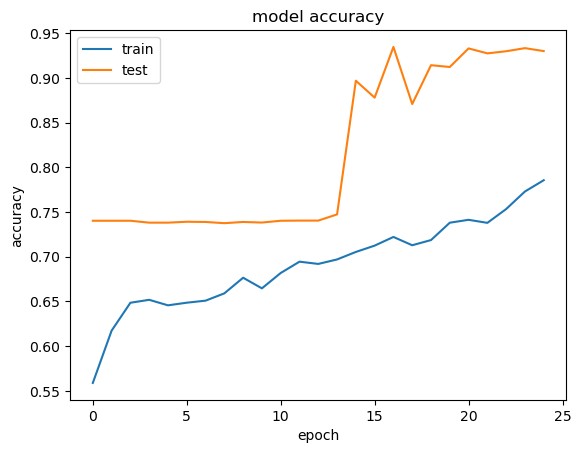

In [832]:
model_trained, history = train_epochs(model, train_ds, val_ds, 25, 0.0001)

In [833]:
date_str = dt.now().strftime("%d%b%Y_%H%M").lower()
model_file_name = f"kws_ufe_{date_str}.h5" 
print(f"Saving model to {model_file_name}")
model.save(model_file_name, overwrite=False)

Saving model to kws_ufe_05may2023_0255.h5


## Model Results

In [834]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

In [835]:
test_audio = []
test_labels = []

for audio, label in test_ds:
  test_audio.append(audio.numpy())
  test_labels.append(label.numpy())

test_audio = np.array(test_audio)
test_labels = np.array(test_labels)

In [836]:
y_pred = np.argmax(model_trained.predict(test_audio), axis=1)
y_true = test_labels
print(y_true)
print(y_pred[:30])

test_acc = sum(np.equal(y_pred, y_true)) / len(y_true)
print(f'Test set accuracy: {test_acc:.0%}')

63/63 [==============================] - 0s 5ms/step
[1 2 2 ... 1 2 2]
[1 2 2 1 0 1 1 1 1 0 1 1 1 0 1 0 0 2 0 1 2 1 2 1 0 1 2 1 2 1]
Test set accuracy: 70%


In [837]:
print(label_list)

['_silence', '_unknown', 'zigzag', 'wow']


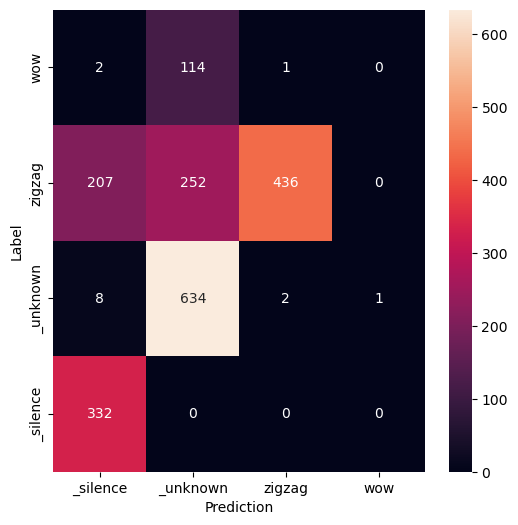

In [838]:
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred) 
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mtx, xticklabels=label_list, yticklabels=label_list, 
            annot=True, fmt='g')
plt.gca().invert_yaxis() # flip so origin is at bottom left
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()


On training set:
2314/2314 [==============================] - 11s 5ms/step
Data set accuracy: 89%


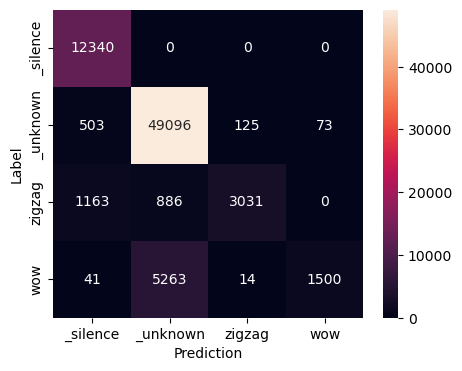

In [839]:
dset = train_ds.unbatch()
print("On training set:")

ds_audio = []
ds_labels = []

for audio, label in dset:
  ds_audio.append(audio.numpy())
  ds_labels.append(label.numpy())

ds_labels = np.array(ds_labels)
ds_audio = np.array(ds_audio)

model_out = model.predict(ds_audio)
y_pred = np.argmax(model_out, axis=1)
y_true = ds_labels

ds_acc = sum(y_pred == y_true) / len(y_true)
print(f'Data set accuracy: {ds_acc:.0%}')

confusion_mtx = tf.math.confusion_matrix(y_true, y_pred) 
plt.figure(figsize=(5,4))
sns.heatmap(confusion_mtx, xticklabels=label_list, yticklabels=label_list, 
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [826]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

1157
265
1989


## Model Quantization

In [827]:
#model_trained = keras.models.load_model(os.path.join(os.getcwd(),"kws_ufe_03may2023_2151.h"))

converter = tf.lite.TFLiteConverter.from_keras_model(model_trained)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.experimental_new_converter=True
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8, tf.lite.OpsSet.SELECT_TF_OPS]

converter.inference_input_type = tf.int8  # or tf.uint8; should match dat_q in eval_quantized_model.py
converter.inference_output_type = tf.int8  # or tf.uint8

tflite_model = converter.convert()

ValueError: For full integer quantization, a `representative_dataset` must be specified.

In [840]:

num_calibration_steps = 10
ds_iter = val_ds.unbatch().batch(1).as_numpy_iterator()
def representative_dataset_gen():
  for _ in range(num_calibration_steps):
    next_input = next(ds_iter)[0]
    next_input = next_input.astype(np.float32)  # (DIFF_FROM_LECTURE)
    yield [next_input]

# Convert model to full-int8 and save as quantized tflite flatbuffer.
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8, tf.lite.OpsSet.SELECT_TF_OPS]
converter.inference_input_type = tf.int8  # or tf.uint8; should match dat_q in eval_quantized_model.py
converter.inference_output_type = tf.int8  # or tf.uint8

tflite_quant_model = converter.convert()


INFO:tensorflow:Assets written to: C:\Users\JBHam\AppData\Local\Temp\tmp9tnun846\assets


INFO:tensorflow:Assets written to: C:\Users\JBHam\AppData\Local\Temp\tmp9tnun846\assets
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [842]:
fname = 'keyword_model_conv.tflite'
with open(fname, "wb") as fpo:
  num_bytes_written = fpo.write(tflite_quant_model)
print(f"Wrote {num_bytes_written} / {len(tflite_quant_model)} bytes to tflite file")

Wrote 43976 / 43976 bytes to tflite file


In [ ]:
!xxd -i keyword_model.tflite >! keyword_model.cc

In [ ]:
interpreter = tf.lite.Interpreter(model_content=quantized_tflite_model)

interpreter.allocate_tensors()

In [ ]:
def evaluate_model(interpreter, val_ds, labels):
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    labels = labels.squeeze()
    # Run predictions on every image in the "test" dataset.
    prediction_digits = []
    
    vals = val_ds.cardinality().numpy()
    total_accuracy = 0.0
    
    for i, (test_image, label) in enumerate(val_ds):
        test_image = np.resize(test_image, (96,96,1)).astype('int8')

        #test_image = test_image.astype('int8')
       
        test_image = np.expand_dims(test_image, axis=0).astype('int8')
      
        interpreter.set_tensor(input_details[0]['index'], test_image)
        interpreter.invoke()
        output = interpreter.get_tensor(output_details[0]['index'])
        #print(output)
        digit = np.argmax(output[0])
        #print(digit)
        prediction_digits.append(digit)
        
 
    # Compare prediction results with ground truth labels to calculate accuracy.
    prediction_digits = np.array(prediction_digits)
    # print(prediction_digits == labels)
    return prediction_digits

In [ ]:
y_pred = evaluate_model(interpreter, val_ds, np.array(labels))
y_pred

from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

conf_matrix = confusion_matrix(labels, y_pred.astype('int'))

import matplotlib.pyplot as plt
import seaborn as sns

results = pd.DataFrame(conf_matrix)
sns.heatmap(results, annot=True)
plt.show()

print(classification_report(labels, y_pred.astype('int')))

## Quantization Results